In [7]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import math

<IPython.core.display.Javascript object>


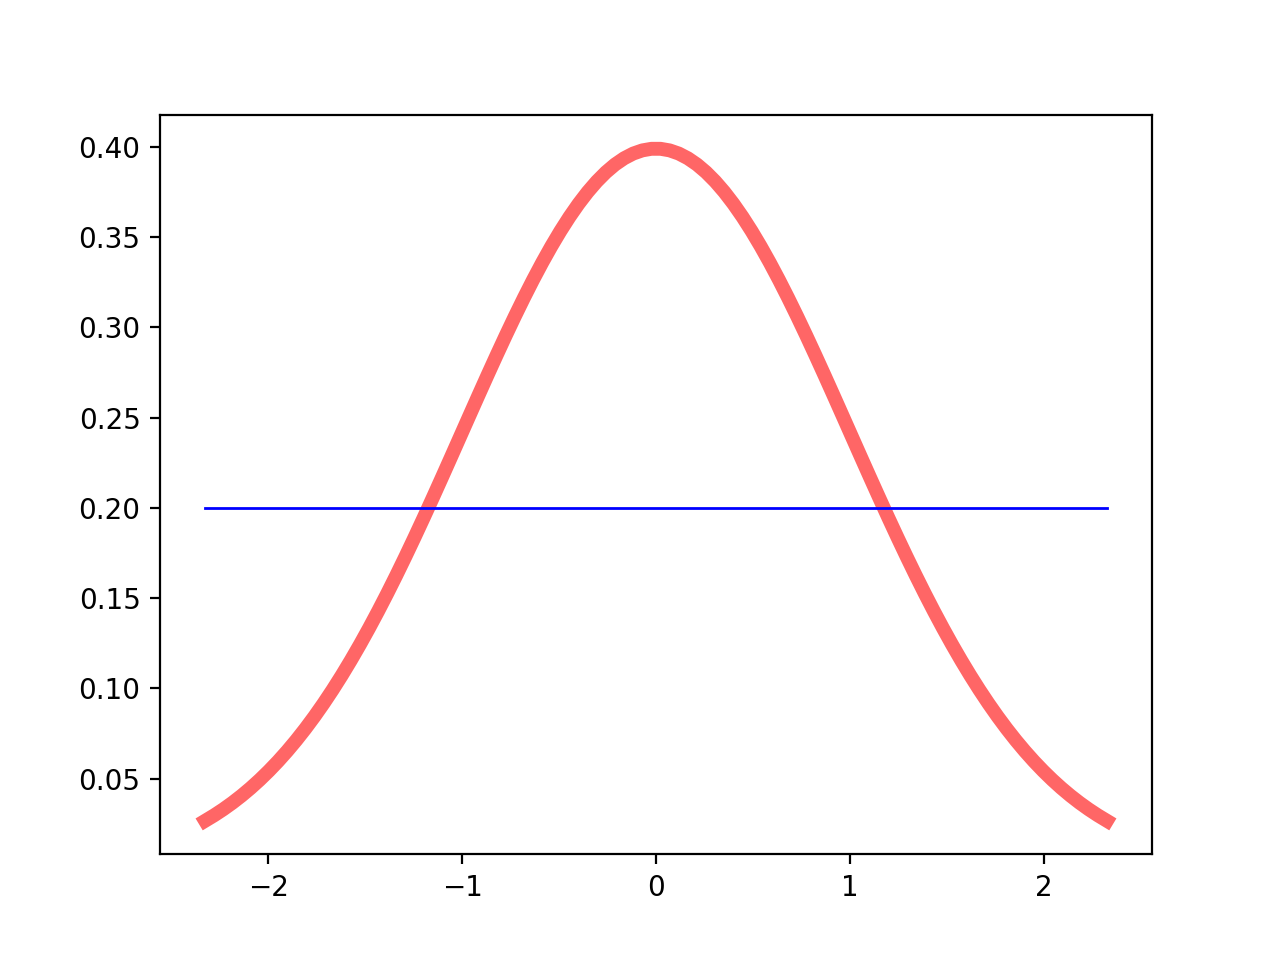

In [8]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [3]:
from xml.etree.ElementTree import parse, dump

In [6]:
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
#dump(proteins[0])

NameError: name 'parse' is not defined

In [15]:
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P00722": # prot de LacZ
            #dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" created="1986-07-21" dataset="Swiss-Prot" modified="2020-08-12" version="204">
<ns0:accession>P00722</ns0:accession>
<ns0:accession>Q2MC80</ns0:accession>
<ns0:name>BGAL_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Beta-galactosidase</ns0:fullName>
<ns0:shortName>Beta-gal</ns0:shortName>
<ns0:ecNumber>3.2.1.23</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>Lactase</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">lacZ</ns0:name>
<ns0:name type="ordered locus">b0344</ns0:name>
<ns0:name type="ordered locus">JW0335</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference id="83333" type="NCBI Taxonomy" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteobacteria</ns0:taxon>
<ns0:taxon>Gammaproteobacteria</ns0:taxon>
<ns0:taxon>Enterobacterales</ns0:taxon>
<ns0:taxon>Entero

<ns0:dbReference id="3VDC" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.55" />
<ns0:property type="chains" value="A/B/C/D=10-1024" />
</ns0:dbReference>
<ns0:dbReference id="4CKD" type="PDB">
<ns0:property type="method" value="EM" />
<ns0:property type="resolution" value="13.00" />
<ns0:property type="chains" value="A/B/C/D=1-1024" />
</ns0:dbReference>
<ns0:dbReference id="4DUV" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.10" />
<ns0:property type="chains" value="A/B/C/D=10-1024" />
</ns0:dbReference>
<ns0:dbReference id="4DUW" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.20" />
<ns0:property type="chains" value="A/B/C/D=10-1024" />
</ns0:dbReference>
<ns0:dbReference id="4DUX" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.30" />
<ns0:property type="chains" value="A/B/C/D=10-1

In [63]:
df = pd.read_csv('data/TCL_wt1.tsv',sep='\t')

In [64]:
df.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
3,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,tufB,#VALEUR!,#VALEUR!,NaN,#VALEUR!
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669


In [77]:
df = df.dropna() 
#df.head()
df_logratio = df['Log2 Corrected Abundance Ratio'].astype(float)
df_logratio.head()

0   -3.721335
1   -3.429569
2   -3.284695
4   -3.204277
5   -3.009460
Name: Log2 Corrected Abundance Ratio, dtype: float64

<IPython.core.display.Javascript object>


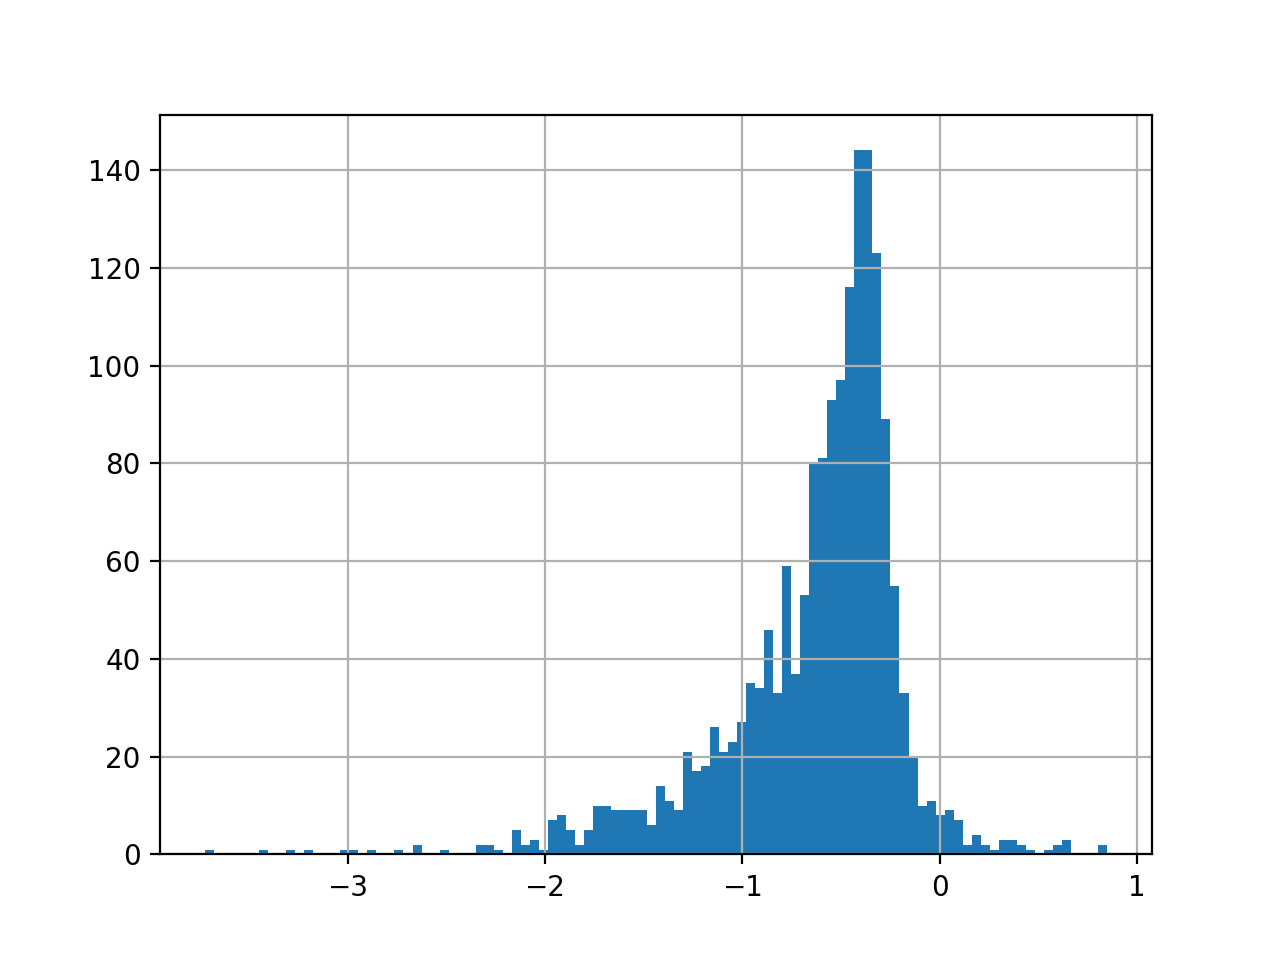

In [66]:
fig, ax = plt.subplots()
df_logratio.hist(bins=100)
fig.show()
#moyenne est plus petite que 0 
#donc quantité de prot plus grand dans condition controle 
# en x : ratio d'abundance : nb_prot_tetra/nb_prot_rich 
# le milieu riche est la condition controle 
# la tetracycline interrompt la traduction, c'est normal d'avoir moins de proteine dans la condition avec tetracycline

In [20]:
moy = np.mean(df_logratio)
moy

-0.6386262156443276

In [67]:
sd = np.std(df_logratio)
sd

0.47062451611275236

<IPython.core.display.Javascript object>


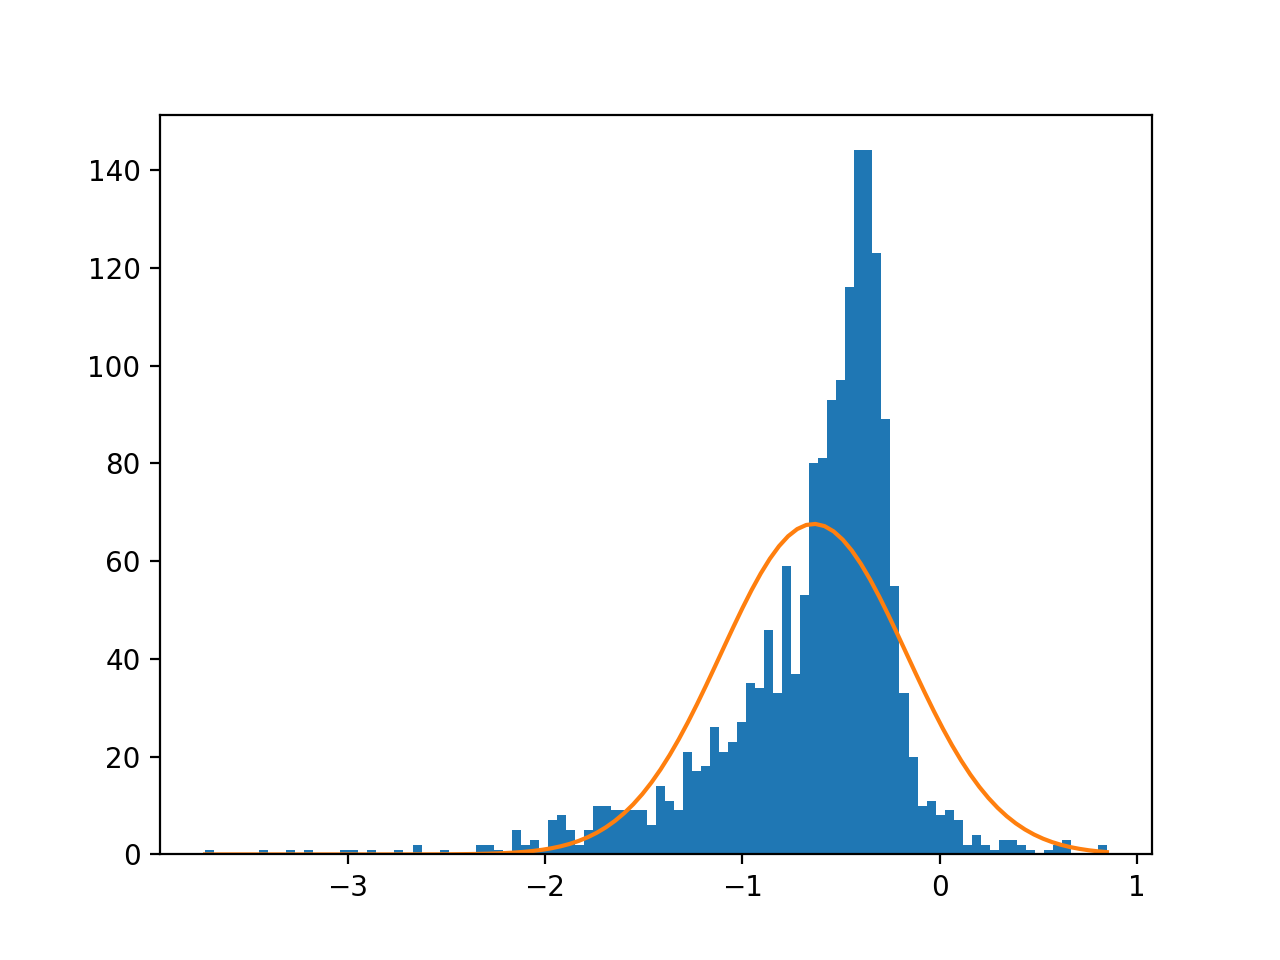

In [68]:
fig, ax = plt.subplots()
hist = ax.hist(df_logratio, bins=100) # draw histogram
x = np.linspace(min(df_logratio), max(df_logratio), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(df_logratio)*dx # scale accordingly
ax.plot(x, norm.pdf(x, moy, sd)*scale) # compute theoritical PDF and draw it
fig.show()

<IPython.core.display.Javascript object>


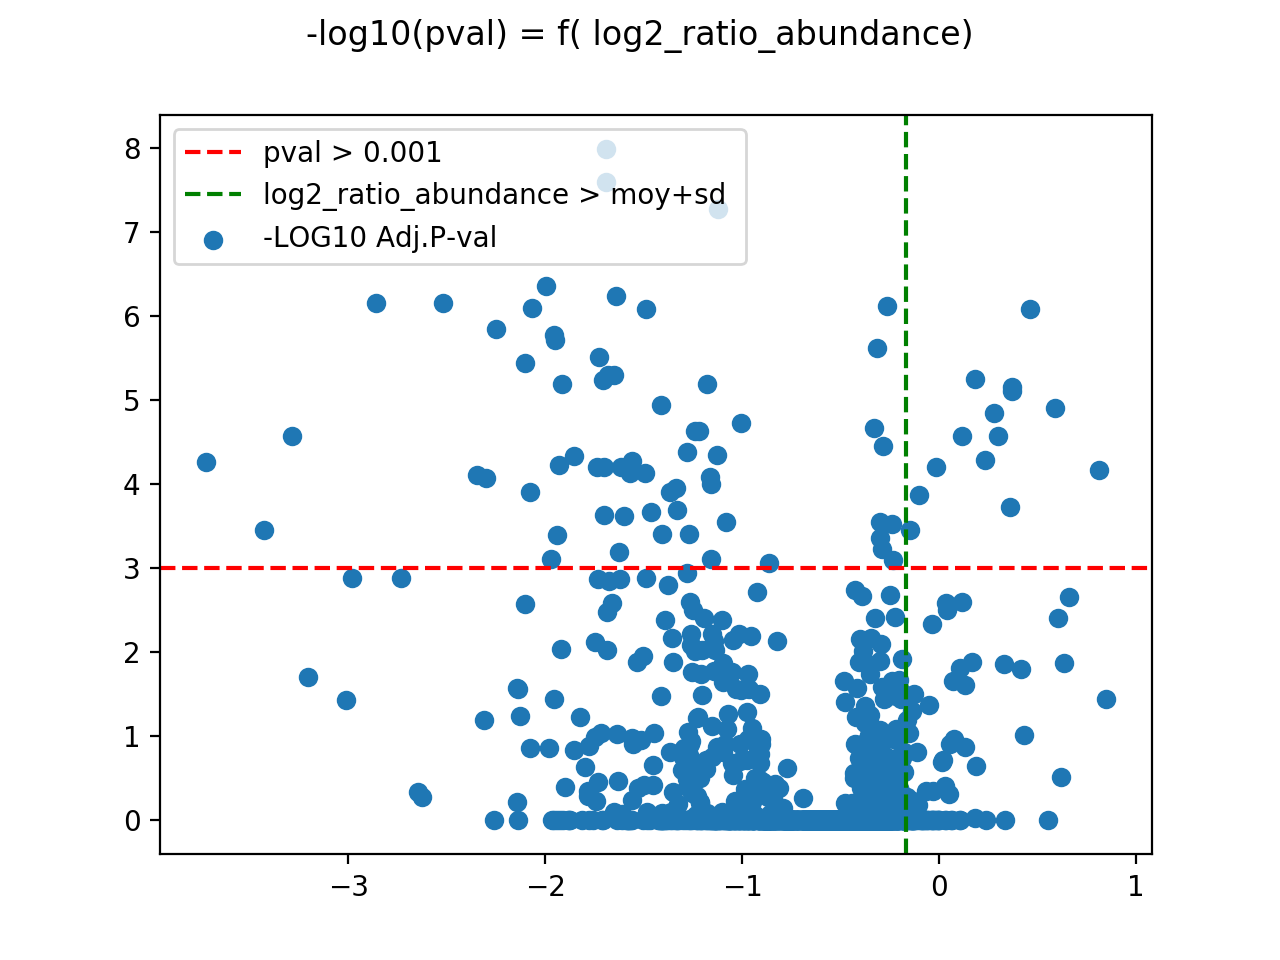

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = df_logratio, y = df['-LOG10 Adj.P-val'].astype(float))
fig.suptitle('-log10(pval) = f( log2_ratio_abundance)')
#ax.plot(x, np.full(len(x), 0.2),'b-', lw=1)
l1 = plt.axhline(-np.log10(0.001),color='red',ls='--')
l1.set_label('pval > 0.001')
l2 = plt.axvline(moy+sd,color='green',ls='--')
l2.set_label('log2_ratio_abundance > moy+sd ')
plt.legend()
fig.show()

### Get Abundant proteins

In [73]:
convert_dict = {'Log2 Corrected Abundance Ratio': float, '-LOG10 Adj.P-val': float } 
df = df.astype(convert_dict) 
print(df.dtypes) 

Accession                                                        object
Description                                                      object
Gene Symbol                                                      object
Corrected Abundance ratio (1.53)                                 object
Log2 Corrected Abundance Ratio                                  float64
Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)    float64
-LOG10 Adj.P-val                                                float64
dtype: object


In [75]:
df_abundant = df.loc[(df['-LOG10 Adj.P-val']>(-np.log10(0.001))) & (df['Log2 Corrected Abundance Ratio']>moy+sd)]
df_abundant

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
1862,P0A8V6,Fatty acid metabolism regulator protein OS=Esc...,fadR,0.90130719,-0.149909,3.510530e-04,3.454627
1898,P0A9Q1,Aerobic respiration control protein ArcA OS=Es...,arcA,0.931372549,-0.102570,1.359440e-04,3.866640
1929,P02358,30S ribosomal protein S6 OS=Escherichia coli (...,rpsF,0.990849673,-0.013262,6.276360e-05,4.202292
1968,P0ACF8,DNA-binding protein H-NS OS=Escherichia coli (...,hns,1.083006536,0.115042,2.679790e-05,4.571899
1977,P62399,50S ribosomal protein L5 OS=Escherichia coli (...,C813_RS16705; C813_RS25010; rplE; AB182_RS27795,1.133986928,0.181404,5.518020e-06,5.258216
1979,P0A905,Outer membrane lipoprotein SlyB OS=Escherichia...,slyB,1.173856209,0.231256,5.109990e-05,4.291580
1982,P76506,Probable phospholipid-binding lipoprotein MlaA...,mlaA,1.21372549,0.279442,1.408320e-05,4.851298
1984,P13036,Fe(3+) dicitrate transport protein FecA OS=Esc...,fecA,1.230718954,0.299501,2.679790e-05,4.571899
1989,P10384,Long-chain fatty acid transport protein OS=Esc...,fadL,1.283660131,0.360263,1.849300e-04,3.732993
1992,P06971,Ferrichrome outer membrane transporter/phage r...,fhuA,1.293464052,0.371240,6.974880e-06,5.156463


### Get GO for abundant proteins

In [89]:
GO = {}
print(df_abundant['Accession'=="P06996"])
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text =="P06996": #in df_abundant['Accession']
            print(df_abundant['Accession'=="P06996"])
            break

SyntaxError: invalid syntax (<ipython-input-89-49b363282179>, line 2)